In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
df = pd.read_csv('Data/Processed_data.csv', index_col=[0])
df.head()

,birth_attendant,birth_place,bmi,cigs_before_preg,birthweight_g,last_norm_menses_mn,last_norm_menses_yr,birth_mn,birth_time,birth_dy,...,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,delivery_method,res_status,prev_cesarean,num_prev_cesareans,infant_sex,weight_gain
0,1.0,1.0,46.3,0.0,2183.0,6.0,2017.0,2.0,1341.0,6.0,...,0.0,0.0,1.0,270.0,1.0,1.0,0.0,0.0,1.0,40.0
1,1.0,1.0,25.5,0.0,3280.0,4.0,2017.0,1.0,621.0,3.0,...,0.0,0.0,0.0,153.0,1.0,2.0,0.0,0.0,0.0,26.0
2,1.0,1.0,21.8,0.0,2410.0,3.0,2018.0,12.0,741.0,3.0,...,0.0,0.0,0.0,123.0,1.0,1.0,0.0,0.0,1.0,31.0
3,3.0,1.0,22.7,0.0,3544.0,3.0,2018.0,12.0,750.0,4.0,...,0.0,1.0,1.0,124.0,2.0,1.0,1.0,1.0,0.0,26.0
4,1.0,1.0,34.0,3.0,2778.0,10.0,2017.0,7.0,1423.0,7.0,...,0.0,1.0,1.0,192.0,1.0,1.0,0.0,0.0,1.0,0.0


In [15]:
#df = df.drop(['marital_stat'], axis=1)
X = df.drop(['birthweight_g'], axis=1)
y = df['birthweight_g']

In [16]:
X_scaled = StandardScaler().fit_transform(X)

In [17]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [18]:
pca = PCA(n_components=5)

X_pca = pca.fit_transform(X_scaled)

In [19]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.09150934, 0.07381068, 0.06994533, 0.05264494, 0.04656454])

In [20]:
#These 5 principal components only explain 14% of the variance.. not good 
sum(explained_variance)*100

33.44748331942819

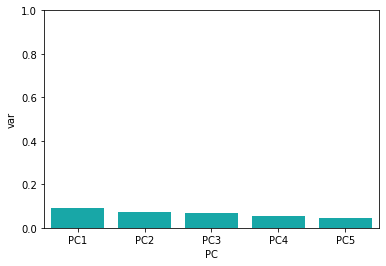

In [21]:
pca_df = pd.DataFrame({'var':explained_variance,
             'PC':['PC1','PC2','PC3','PC4','PC5']})

sns.barplot(x='PC', y="var", data=pca_df, color="c").set(ylim=(0, 1));

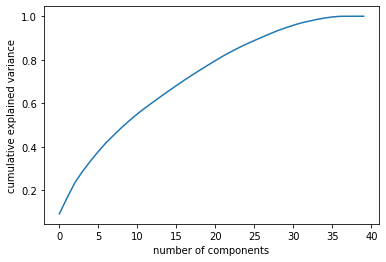

In [22]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

* Could try randomised PCA etc.?